Entrez une liste de tickers séparés par des virgules (ex : VOO, QQQ, IWM) :  VOO,QQQ,IWM
Souhaitez-vous définir une plage de dates personnalisée ? (oui/non) :  non


Analyse comparative des ETF
Récupération des données pour : VOO


[*********************100%***********************]  1 of 1 completed


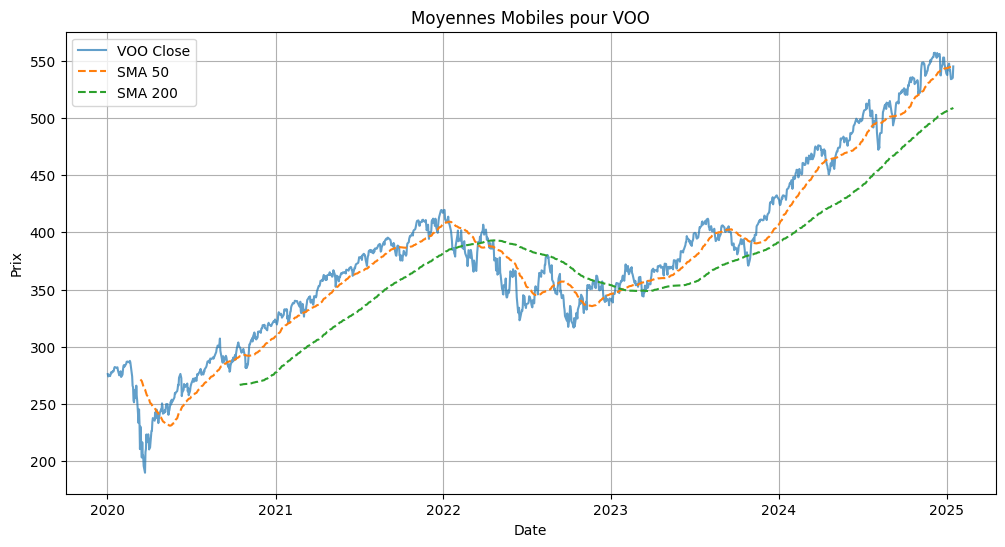

[*********************100%***********************]  1 of 1 completed

Récupération des données pour : QQQ


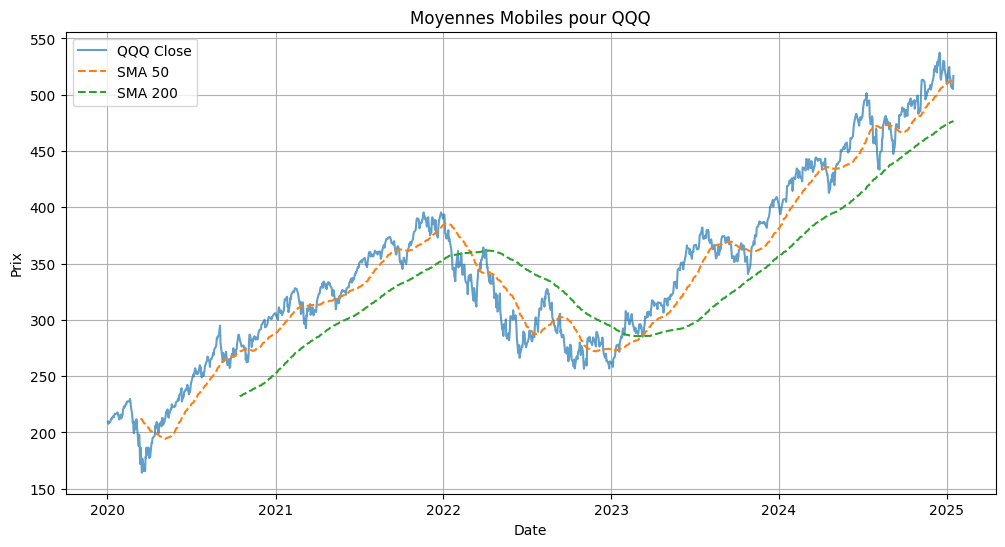

Récupération des données pour : IWM


[*********************100%***********************]  1 of 1 completed


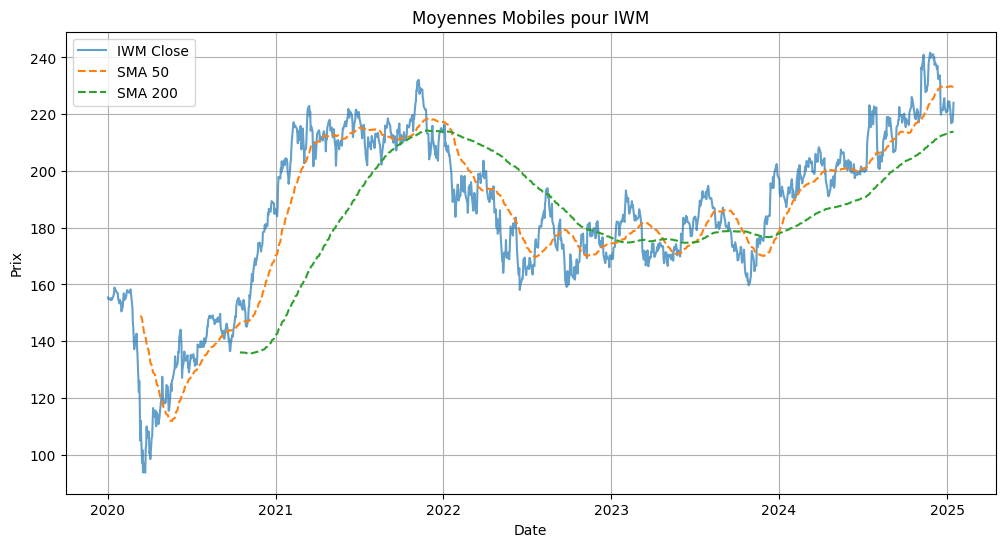


Tableau comparatif :
  Ticker  Rendement Annuel Moyen  Volatilité Annuelle  Ratio de Sharpe
0    VOO                0.158110             0.212630         0.743590
1    QQQ                0.212540             0.256147         0.829758
2    IWM                0.110342             0.273151         0.403958


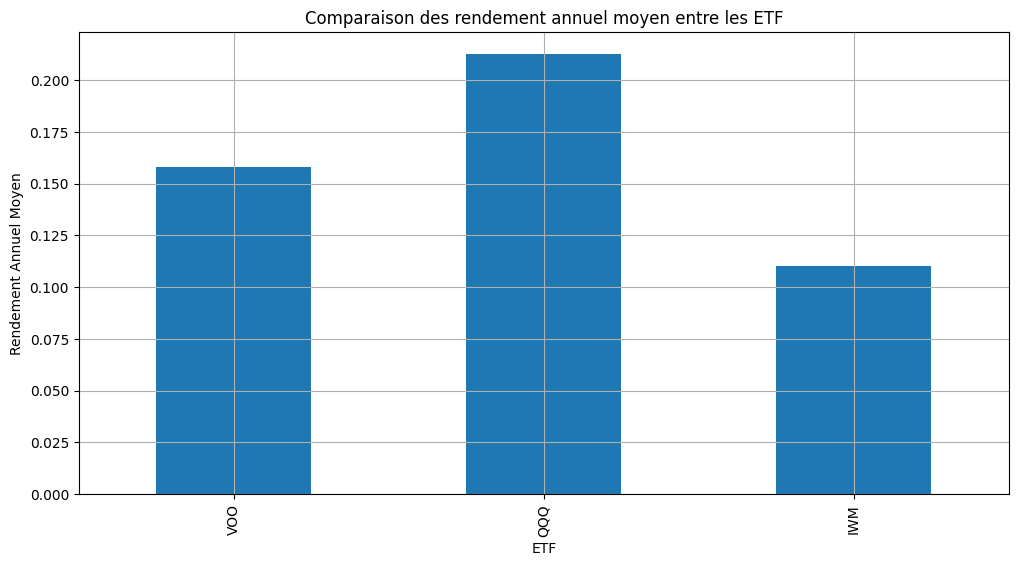

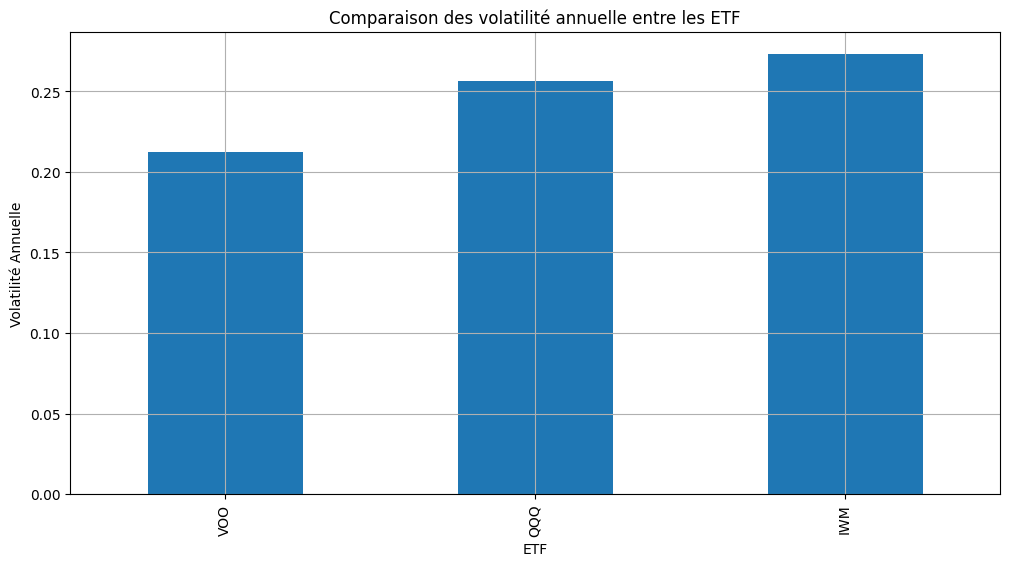

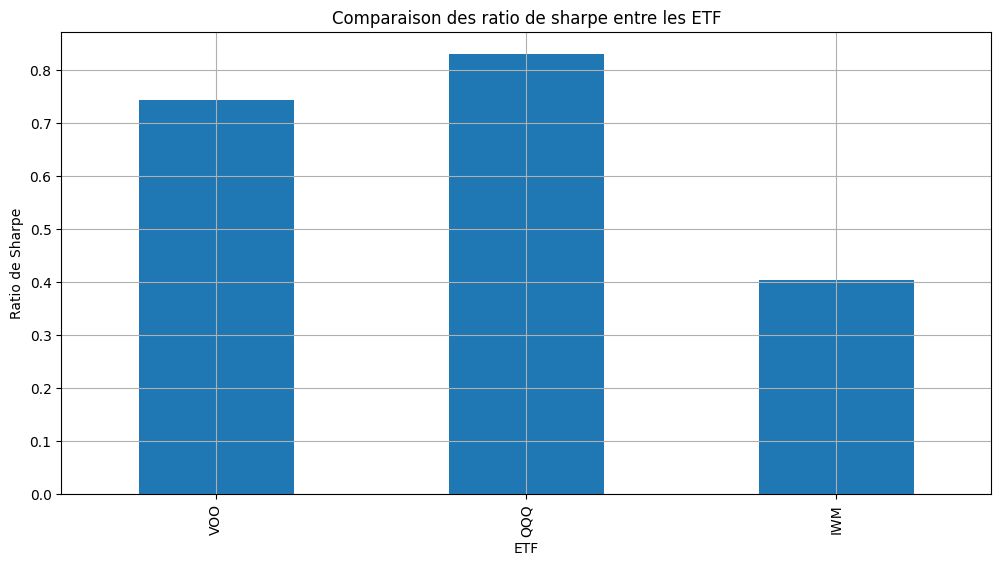


Matrice de corrélation :
          VOO       QQQ       IWM
VOO  1.000000  0.928697  0.863329
QQQ  0.928697  1.000000  0.752680
IWM  0.863329  0.752680  1.000000


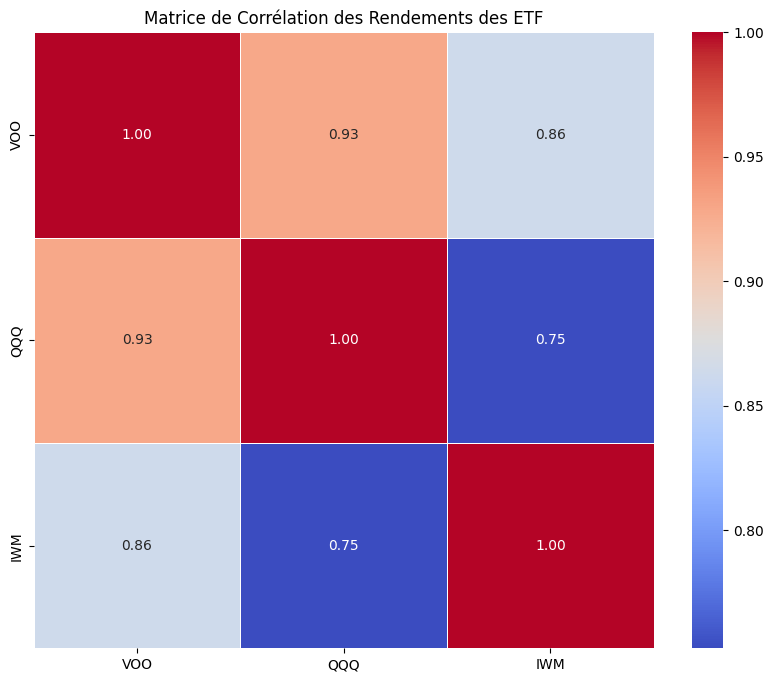


Rapport final et recommandations :

ETF : VOO
- Décision : NE PAS INVESTIR. Le risque est trop élevé ou les performances sont insuffisantes.

ETF : QQQ
- Décision : NE PAS INVESTIR. Le risque est trop élevé ou les performances sont insuffisantes.

ETF : IWM
- Décision : NE PAS INVESTIR. Le risque est trop élevé ou les performances sont insuffisantes.


In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def comparer_etfs(tickers, start_date="2020-01-01", end_date=None):
    """
    Compare plusieurs ETF en affichant leurs rendements annuels moyens, volatilités annuelles,
    ratios de Sharpe, moyennes mobiles (SMA), et analyse de corrélation.
    """
    if not end_date:
        end_date = datetime.today().strftime('%Y-%m-%d')

    print("Analyse comparative des ETF")
    print("=" * 40)

    # Initialisation des listes pour les données
    comparaison = []
    prices = pd.DataFrame()

    for ticker in tickers:
        print(f"Récupération des données pour : {ticker}")

        try:
            data = yf.download(ticker, start=start_date, end=end_date)
        except Exception as e:
            print(f"Erreur lors du téléchargement des données pour {ticker} : {e}")
            continue

        if data.empty:
            print(f"Aucune donnée disponible pour {ticker}.")
            continue

        # Calcul des moyennes mobiles
        data['SMA_50'] = data['Close'].rolling(window=50).mean()
        data['SMA_200'] = data['Close'].rolling(window=200).mean()

        # Calcul des rendements et métriques
        data['Daily Return'] = data['Close'].pct_change()
        annual_return = data['Daily Return'].mean() * 252
        annual_volatility = data['Daily Return'].std() * (252 ** 0.5)
        sharpe_ratio = annual_return / annual_volatility if annual_volatility != 0 else 0

        # Ajout des résultats au tableau comparatif
        comparaison.append({
            "Ticker": ticker,
            "Rendement Annuel Moyen": annual_return,
            "Volatilité Annuelle": annual_volatility,
            "Ratio de Sharpe": sharpe_ratio
        })

        # Ajout des prix de clôture au DataFrame des prix
        prices[ticker] = data['Close']

        # Visualisation des moyennes mobiles pour chaque ETF
        plt.figure(figsize=(12, 6))
        plt.plot(data['Close'], label=f"{ticker} Close", alpha=0.7)
        plt.plot(data['SMA_50'], label="SMA 50", linestyle='--')
        plt.plot(data['SMA_200'], label="SMA 200", linestyle='--')
        plt.title(f"Moyennes Mobiles pour {ticker}")
        plt.xlabel("Date")
        plt.ylabel("Prix")
        plt.legend()
        plt.grid()
        plt.show()

    # Création d'un DataFrame pour les résultats comparatifs
    comparaison_df = pd.DataFrame(comparaison)

    if comparaison_df.empty:
        print("Aucune donnée disponible pour comparaison.")
        return

    # Affichage des résultats sous forme de tableau
    print("\nTableau comparatif :")
    print(comparaison_df)

    # Visualisation des comparaisons
    for metric in ["Rendement Annuel Moyen", "Volatilité Annuelle", "Ratio de Sharpe"]:
        comparaison_df.plot(x="Ticker", y=metric, kind="bar", legend=False, figsize=(12, 6))
        plt.title(f"Comparaison des {metric.lower()} entre les ETF")
        plt.xlabel("ETF")
        plt.ylabel(metric)
        plt.grid()
        plt.show()

    # Analyse de corrélation
    corr_matrix = prices.pct_change().corr()
    print("\nMatrice de corrélation :")
    print(corr_matrix)

    # Visualisation de la matrice de corrélation
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Matrice de Corrélation des Rendements des ETF")
    plt.show()

    # Rapport final et décision
    print("\nRapport final et recommandations :")
    for index, row in comparaison_df.iterrows():
        print(f"\nETF : {row['Ticker']}")
        if row['Ratio de Sharpe'] > 1.0 and row['Rendement Annuel Moyen'] > 0.10 and row['Volatilité Annuelle'] < 0.20:
            print("- Décision : INVESTIR. Cet ETF présente un excellent équilibre entre rendement et risque.")
        elif 0.5 <= row['Ratio de Sharpe'] <= 1.0 and 0.05 < row['Rendement Annuel Moyen'] <= 0.10 and row['Volatilité Annuelle'] <= 0.20:
            print("- Décision : ATTENDRE. Cet ETF est correct, mais des signaux plus clairs sont nécessaires.")
        else:
            print("- Décision : NE PAS INVESTIR. Le risque est trop élevé ou les performances sont insuffisantes.")

# Entrée des tickers à comparer
tickers = input("Entrez une liste de tickers séparés par des virgules (ex : VOO, QQQ, IWM) : ").strip().upper().split(',')

# Entrée des dates (facultative)
define_dates = input("Souhaitez-vous définir une plage de dates personnalisée ? (oui/non) : ").strip().lower()
if define_dates == "oui":
    start_date = input("Entrez la date de début (YYYY-MM-DD) : ").strip()
    end_date = input("Entrez la date de fin (YYYY-MM-DD) : ").strip()
    comparer_etfs(tickers, start_date=start_date, end_date=end_date)
else:
    comparer_etfs(tickers)
